Implement looping logic to route the flow of data back to the nodes

Create a single conditional edge to handle decision-making and control graph flow

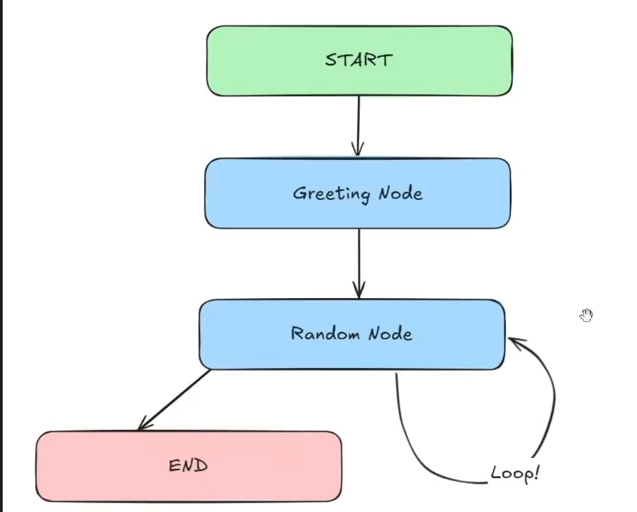

In [5]:
from IPython.display import Image, display

display(Image(filename='imgs/05_graph.png'))

In [6]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, START, END
import random

In [7]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: str

In [8]:
def greeting_node(state:AgentState) -> AgentState:
    """
    Greeting node which says hi to the person
    """
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0
    return state

def random_node(state:AgentState) -> AgentState:
    """
    Generates random number from 0 to 10
    """
    state["number"].append(random.randint(0,10))
    state["counter"] += 1
    return state

def should_continue(state:AgentState) -> AgentState:
    """
    Function to decide what to do next
    """

    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop" #continue with the loop
    else:
        return "exit" # exit the loop
    



trajectory has to be 

greeting -> random -> random -> random -> random -> random -> END

In [9]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)


graph.add_edge("greeting", "random")

graph.add_conditional_edges(

    "random", # source node
    should_continue, #action
    {
    "loop": "random", # self-loop back to the same node
    "exit": END # end the graph
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

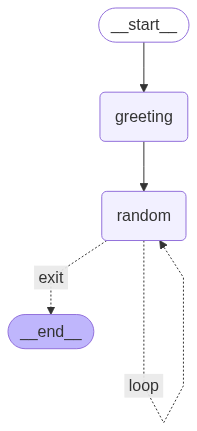

In [10]:
# display the graph created

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
app.invoke({"name":"Mark", "number": [], "counter": -2})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Mark', 'number': [7, 8, 5, 4, 3], 'counter': 5}